# Amazon Brazil Products 2023
Esta análise tem como finalidade extrair informações por meio dos dados amazon. Ademais, conjunto de dados contém mais de 1,3 milhão de produtos exclusivos da Amazon.com.br. Inclui informações como títulos, URLs de produtos, preços, classificações e muito mais. Os dados foram coletados por meio de web scraping em 2023.



### Obtenção dos Dados

Os dados utilizados neste notebook foram obtidos a partir do site Kaggle.
O objetivo é realizar uma análise exploratória, a base utilizada foi:
- Amazon Brazil Products 2023

In [61]:
# Importanto bibliotecas
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [62]:
# Importanto base
df_tab1 = pd.read_csv("./amazon_brazil_products_2023.csv", sep=",", encoding= 'UTF-8')

## Análise dos Dados
Nesta etapa serão observados quais são os dados das bases e verificar sua estrututura, analisando um recorte da base.

In [63]:
# Identificando tipo dos dataframe
print(type(df_tab1))

<class 'pandas.core.frame.DataFrame'>


In [64]:
# Identicando dados nulos do dataframe tab1
df_tab1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344513 entries, 0 to 1344512
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1344513 non-null  object 
 1   title              1344512 non-null  object 
 2   imgUrl             1344513 non-null  object 
 3   productURL         1344513 non-null  object 
 4   stars              1344513 non-null  float64
 5   reviews            1344513 non-null  int64  
 6   price              1344513 non-null  float64
 7   listPrice          1344513 non-null  float64
 8   categoryName       1344513 non-null  object 
 9   isBestSeller       1344513 non-null  bool   
 10  boughtInLastMonth  1344513 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 103.9+ MB


In [65]:
# Verificando o tamanho do dataframe tab1, linhas e colunas
df_tab1.shape

(1344513, 11)

In [66]:
# Imprimindo as 10 primeiras linhas do dataframe tab1
df_tab1.head(10)

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth
0,B0C154VR2L,"SAMSUNG Smart TV Crystal 50"" 4K UHD CU7700 - A...",https://m.media-amazon.com/images/I/71vk2qFDSP...,https://www.amazon.com.br/dp/B0C154VR2L,4.6,269,2279.05,0.0,"TV, Áudio e Cinema em Casa",False,0
1,B0C85J5HYD,Mini Projetor Portatil 5G Wifi 6 Bluetooth 5.0...,https://m.media-amazon.com/images/I/5133wKaOqS...,https://www.amazon.com.br/dp/B0C85J5HYD,4.5,816,409.99,0.0,"TV, Áudio e Cinema em Casa",True,5000
2,B0C1538ZJ4,"Samsung Smart TV Crystal 43"" 4K UHD CU7700 - A...",https://m.media-amazon.com/images/I/71vk2qFDSP...,https://www.amazon.com.br/dp/B0C1538ZJ4,4.7,638,1969.00,2499.0,"TV, Áudio e Cinema em Casa",False,0
3,B0B4V379PC,"Samsung 60BU8000 - Smart TV LED 60' 4K UHD, Wi...",https://m.media-amazon.com/images/I/8110fzpU-P...,https://www.amazon.com.br/dp/B0B4V379PC,4.6,675,3099.00,0.0,"TV, Áudio e Cinema em Casa",False,0
4,B0899BRB4B,Smart TV LED 32'' HD Samsung LH32BETBLGGXZD,https://m.media-amazon.com/images/I/61M025WzQd...,https://www.amazon.com.br/dp/B0899BRB4B,4.7,3945,1079.90,1369.0,"TV, Áudio e Cinema em Casa",True,0
5,B0BTF68G5R,"Samsung Q90T - Smart TV QLED 55"", 4K, UHD, 120...",https://m.media-amazon.com/images/I/81pG3lqFVn...,https://www.amazon.com.br/dp/B0BTF68G5R,4.6,313,3399.00,4749.0,"TV, Áudio e Cinema em Casa",False,0
6,B0C6NL4QK3,"Smart TV 43"" 4K LG UHD ThinQ AI 43UR7800PSA HD...",https://m.media-amazon.com/images/I/61tj18g5uw...,https://www.amazon.com.br/dp/B0C6NL4QK3,4.5,111,1899.00,2849.0,"TV, Áudio e Cinema em Casa",False,0
7,B08B14TSHS,"Samsung UN32T4300AGXZD - Smart TV LED 32"" HD, ...",https://m.media-amazon.com/images/I/61sof9Qtl9...,https://www.amazon.com.br/dp/B08B14TSHS,4.7,2480,1071.00,1369.0,"TV, Áudio e Cinema em Casa",False,0
8,B0899GJHWR,"Smart TV LED 43"" Full HD Samsung LH43BETMLGGXZ...",https://m.media-amazon.com/images/I/51mB03occB...,https://www.amazon.com.br/dp/B0899GJHWR,4.7,517,1799.00,0.0,"TV, Áudio e Cinema em Casa",False,0
9,B09KNTBKMP,"Roku Express - Streaming player Full HD, Trans...",https://m.media-amazon.com/images/I/71eSUOlx1d...,https://www.amazon.com.br/dp/B09KNTBKMP,4.7,8391,212.00,222.9,"TV, Áudio e Cinema em Casa",False,0


### Dicionário das variáveis tab1 - Amazon Brazil Products 2023
- Asin: ID do produto;
- Title: descrição do produto;
- imgUrl: link da imagem do produto;
- productUrl: link do produto;
- Starts: nota do produto;
- Reviews: quantidade de avaliações por produto;
- Price: preço do produto;
- listPrice: preço original pré-desconto;
- categoryName: categoria do produto;
- isBestSeller: identifica se o produto está marcado como best-seller;
- boughtInLastMonth: mostra a quantidade de cada produto comprada no último mês.

### Tratamento do dataframe

In [67]:
### Atualizando nome das colunas
df_tab1.rename(columns = {'asin':'ID do Produto', 'title':'Descrição','imgUrl':'Imagem do Produto','productURL':'Link do Produto','stars':'Nota do Produto','reviews':'Feedbacks','price':'Preço','listPrice':'Preço sem Desconto','categoryName':'Categoria do Produto','isBestSeller':'Best-Seller','boughtInLastMonth'
:'Comprados no Último Mês'}, inplace = True)

In [68]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes do datarame tab1
((df_tab1.isnull().sum() / df_tab1.shape[0])*100).sort_values(ascending=False)

Descrição                  0.000074
ID do Produto              0.000000
Imagem do Produto          0.000000
Link do Produto            0.000000
Nota do Produto            0.000000
Feedbacks                  0.000000
Preço                      0.000000
Preço sem Desconto         0.000000
Categoria do Produto       0.000000
Best-Seller                0.000000
Comprados no Último Mês    0.000000
dtype: float64

In [69]:
# Remove linhas com valores vazios em uma coluna especifíca
df_tab1.dropna(subset=['Descrição'])

,ID do Produto,Descrição,Imagem do Produto,Link do Produto,Nota do Produto,Feedbacks,Preço,Preço sem Desconto,Categoria do Produto,Best-Seller,Comprados no Último Mês
0,B0C154VR2L,"SAMSUNG Smart TV Crystal 50"" 4K UHD CU7700 - A...",https://m.media-amazon.com/images/I/71vk2qFDSP...,https://www.amazon.com.br/dp/B0C154VR2L,4.6,269,2279.05,0.0,"TV, Áudio e Cinema em Casa",False,0
1,B0C85J5HYD,Mini Projetor Portatil 5G Wifi 6 Bluetooth 5.0...,https://m.media-amazon.com/images/I/5133wKaOqS...,https://www.amazon.com.br/dp/B0C85J5HYD,4.5,816,409.99,0.0,"TV, Áudio e Cinema em Casa",True,5000
2,B0C1538ZJ4,"Samsung Smart TV Crystal 43"" 4K UHD CU7700 - A...",https://m.media-amazon.com/images/I/71vk2qFDSP...,https://www.amazon.com.br/dp/B0C1538ZJ4,4.7,638,1969.00,2499.0,"TV, Áudio e Cinema em Casa",False,0
3,B0B4V379PC,"Samsung 60BU8000 - Smart TV LED 60' 4K UHD, Wi...",https://m.media-amazon.com/images/I/8110fzpU-P...,https://www.amazon.com.br/dp/B0B4V379PC,4.6,675,3099.00,0.0,"TV, Áudio e Cinema em Casa",False,0
4,B0899BRB4B,Smart TV LED 32'' HD Samsung LH32BETBLGGXZD,https://m.media-amazon.com/images/I/61M025WzQd...,https://www.amazon.com.br/dp/B0899BRB4B,4.7,3945,1079.90,1369.0,"TV, Áudio e Cinema em Casa",True,0
...,...,...,...,...,...,...,...,...,...,...,...
1344508,B0CG81Q7YZ,Capa INFiLAND Flex Cover Tab S8 Plus 12.4 pol ...,https://m.media-amazon.com/images/I/71L1XW1F6R...,https://www.amazon.com.br/dp/B0CG81Q7YZ,0.0,0,229.00,254.0,Computadores e Informática,False,0
1344509,B0CJ418PM1,Teclado para Notebook compatível com Thinkpad ...,https://m.media-amazon.com/images/I/61c7FFn0Ji...,https://www.amazon.com.br/dp/B0CJ418PM1,0.0,0,235.34,0.0,Computadores e Informática,False,0
1344510,B09YHX87RM,KKcare Tablet gráfico LED A5 Light Pad Digital...,https://m.media-amazon.com/images/I/616v6AkvNV...,https://www.amazon.com.br/dp/B09YHX87RM,0.0,0,81.89,0.0,Computadores e Informática,False,0
1344511,B0CKS1GBMM,Bateria para Notebook Ne57007b,https://m.media-amazon.com/images/I/41NnZx7wg+...,https://www.amazon.com.br/dp/B0CKS1GBMM,0.0,0,139.41,0.0,Computadores e Informática,False,0


In [70]:
# Descrição estatistíca da base
df_tab1.describe()

,Nota do Produto,Feedbacks,Preço,Preço sem Desconto,Comprados no Último Mês
count,1.344513e+06,1.344513e+06,1.344513e+06,1.344513e+06,1.344513e+06
mean,1.471351e+00,2.122310e+02,2.178570e+02,6.530384e+01,4.350088e+00
std,2.107560e+00,4.581190e+03,8.562086e+02,2.874167e+03,9.435886e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,2.500000e+01,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,6.900000e+01,0.000000e+00,0.000000e+00
75%,4.200000e+00,3.000000e+00,1.539900e+02,0.000000e+00,0.000000e+00
max,5.000000e+00,1.878552e+06,1.000000e+05,1.999000e+06,4.000000e+04


## Processamento
Nesta etapa, será o momento de responder questionamentos que posteriormente, irá gerar insights.
As perguntas a serem respondidas são:

1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? 
2. Quais os tipos das variáveis?
3. Quais são os produtos da base?
4. Quais são as categorias dos produtos?
5. Quantos produtos são best-seller?

### Produtos mais caros
6. Quais foram o top 10 de produtos mais vendidos em 2023?
7. Qual é a nota desses produtos?
8. Esses produtos são best-seller?
9. Qual é o produto mais caro?
10. Esse produto é bem avaliado e é best-seller?
11. Qual o produto mais barato?
12. Esse produto é bem avaliado e é best-seller?

### Produtos mais baratos
13. Quais foram o top 10 de produtos menos vendidos em 2023?
14. Qual é a nota desses produtos?
15. Esses produtos são best-seller?
16. Qual é o produto mais caro?
17. Esse produto é bem avaliado e é best-seller?
18. Qual o produto mais barato?
19. Esse produto é bem avaliado e é best-seller?

### Análise mais profunda
20. Análise das tendências de preços em diferentes categorias de produtos.
- a) Soma total.
- b) Média.
- c) Valor Máximo.
21. Correlação entre as avaliações dos clientes e o número de avaliações.
22. Relação entre preços e avaliações dos clientes.
23. Quantos dos produtos comprados no último mês são best-seller?

In [71]:
# 1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? 
print("Entradas:\t{}".format(df_tab1.shape[0]))
print("Variáveis:\t{}\n".format(df_tab1.shape[1]))


Entradas:	1344513
Variáveis:	11



In [72]:
# 2. Quais os tipos das variáveis?
df_tab1.dtypes

ID do Produto               object
Descrição                   object
Imagem do Produto           object
Link do Produto             object
Nota do Produto            float64
Feedbacks                    int64
Preço                      float64
Preço sem Desconto         float64
Categoria do Produto        object
Best-Seller                   bool
Comprados no Último Mês      int64
dtype: object

In [73]:
# 3. Quais são os produtos da base?
df_tab1['ID do Produto'].value_counts()

B0C154VR2L    1
B08ZM1G6DP    1
B08L9MYQ4T    1
B08TR76NFT    1
B079H2H7P8    1
             ..
B0C3WSHPPX    1
B0C9SQV2TL    1
B0C9VKVKS1    1
B0CGKN2GKX    1
B00P10QYCC    1
Name: ID do Produto, Length: 1344513, dtype: int64

In [74]:
# 4. Quais são as categorias dos produtos?
df_categorias = df_tab1['Categoria do Produto'].value_counts()
df_categorias

Bebês                                         32017
Eletrônicos                                   31453
Mochilas                                      19121
Produtos de Cuidados com a Pele               19010
Instrumentos para Modelagem de Cabelo         19010
                                              ...  
Indicações Amazon                                61
TV, Áudio e Cinema em Casa                       48
Produtos de Proteção do Sol e Bronzeadores       39
Lançamentos                                      31
Pré-venda e Lançamentos                          13
Name: Categoria do Produto, Length: 206, dtype: int64

In [75]:
# 5. Quantos produtos são best-seller?
df_prodBest = df_tab1.loc[:,["Descrição","Best-Seller"]]
df_prodBest.groupby(['Best-Seller']).count()

,Descrição
Best-Seller,
False,1342123
True,2389


### Produtos Mais Caros

In [76]:
# 6. Quais foram o top 10 de produtos vendidos em 2023?
# 7. Qual é a nota desses produtos?
df_produtosMais = df_tab1.nsmallest(10,['Comprados no Último Mês'])
df_produtosMais.loc[:,["Descrição", "Nota do Produto", "Preço", "Preço sem Desconto", "Categoria do Produto", "Best-Seller", "Comprados no Último Mês"]]
df_produtosMais.sort_values(["Preço"], axis=0, ascending=False, inplace=True)
df_produtosMais

,ID do Produto,Descrição,Imagem do Produto,Link do Produto,Nota do Produto,Feedbacks,Preço,Preço sem Desconto,Categoria do Produto,Best-Seller,Comprados no Último Mês
5,B0BTF68G5R,"Samsung Q90T - Smart TV QLED 55"", 4K, UHD, 120...",https://m.media-amazon.com/images/I/81pG3lqFVn...,https://www.amazon.com.br/dp/B0BTF68G5R,4.6,313,3399.00,4749.0,"TV, Áudio e Cinema em Casa",False,0
3,B0B4V379PC,"Samsung 60BU8000 - Smart TV LED 60' 4K UHD, Wi...",https://m.media-amazon.com/images/I/8110fzpU-P...,https://www.amazon.com.br/dp/B0B4V379PC,4.6,675,3099.00,0.0,"TV, Áudio e Cinema em Casa",False,0
0,B0C154VR2L,"SAMSUNG Smart TV Crystal 50"" 4K UHD CU7700 - A...",https://m.media-amazon.com/images/I/71vk2qFDSP...,https://www.amazon.com.br/dp/B0C154VR2L,4.6,269,2279.05,0.0,"TV, Áudio e Cinema em Casa",False,0
2,B0C1538ZJ4,"Samsung Smart TV Crystal 43"" 4K UHD CU7700 - A...",https://m.media-amazon.com/images/I/71vk2qFDSP...,https://www.amazon.com.br/dp/B0C1538ZJ4,4.7,638,1969.00,2499.0,"TV, Áudio e Cinema em Casa",False,0
6,B0C6NL4QK3,"Smart TV 43"" 4K LG UHD ThinQ AI 43UR7800PSA HD...",https://m.media-amazon.com/images/I/61tj18g5uw...,https://www.amazon.com.br/dp/B0C6NL4QK3,4.5,111,1899.00,2849.0,"TV, Áudio e Cinema em Casa",False,0
8,B0899GJHWR,"Smart TV LED 43"" Full HD Samsung LH43BETMLGGXZ...",https://m.media-amazon.com/images/I/51mB03occB...,https://www.amazon.com.br/dp/B0899GJHWR,4.7,517,1799.00,0.0,"TV, Áudio e Cinema em Casa",False,0
4,B0899BRB4B,Smart TV LED 32'' HD Samsung LH32BETBLGGXZD,https://m.media-amazon.com/images/I/61M025WzQd...,https://www.amazon.com.br/dp/B0899BRB4B,4.7,3945,1079.90,1369.0,"TV, Áudio e Cinema em Casa",True,0
7,B08B14TSHS,"Samsung UN32T4300AGXZD - Smart TV LED 32"" HD, ...",https://m.media-amazon.com/images/I/61sof9Qtl9...,https://www.amazon.com.br/dp/B08B14TSHS,4.7,2480,1071.00,1369.0,"TV, Áudio e Cinema em Casa",False,0
9,B09KNTBKMP,"Roku Express - Streaming player Full HD, Trans...",https://m.media-amazon.com/images/I/71eSUOlx1d...,https://www.amazon.com.br/dp/B09KNTBKMP,4.7,8391,212.00,222.9,"TV, Áudio e Cinema em Casa",False,0
11,B088C4QZV2,Lâmpada Inteligente Smart Color 10W Elgin RGB ...,https://m.media-amazon.com/images/I/61dLgPIgKM...,https://www.amazon.com.br/dp/B088C4QZV2,4.6,42444,49.93,99.0,"TV, Áudio e Cinema em Casa",True,0


In [77]:
# 8. Esses produtos são best-seller?
df_bestMais = df_produtosMais.loc[:,["Descrição", "Best-Seller"]]
df_bestMais.groupby("Best-Seller").count()

,Descrição
Best-Seller,
False,8
True,2


In [78]:
# 9. Qual é o produto mais caro entre o top 10 produtos mais caros?
# 10. Esse produto é bem avaliado e é best-seller?
df_produtoMaisC = df_produtosMais.nlargest(1,['Preço'])
df_produtoMaisC

,ID do Produto,Descrição,Imagem do Produto,Link do Produto,Nota do Produto,Feedbacks,Preço,Preço sem Desconto,Categoria do Produto,Best-Seller,Comprados no Último Mês
5,B0BTF68G5R,"Samsung Q90T - Smart TV QLED 55"", 4K, UHD, 120...",https://m.media-amazon.com/images/I/81pG3lqFVn...,https://www.amazon.com.br/dp/B0BTF68G5R,4.6,313,3399.0,4749.0,"TV, Áudio e Cinema em Casa",False,0


In [79]:
# 11. Qual o produto mais barato entre o top 10 produtos mais caros?
# 12. Esse produto é bem avaliado e é best-seller?
df_produtoMaisB = df_produtosMais.nsmallest(1,['Preço'])
df_produtoMaisB

,ID do Produto,Descrição,Imagem do Produto,Link do Produto,Nota do Produto,Feedbacks,Preço,Preço sem Desconto,Categoria do Produto,Best-Seller,Comprados no Último Mês
11,B088C4QZV2,Lâmpada Inteligente Smart Color 10W Elgin RGB ...,https://m.media-amazon.com/images/I/61dLgPIgKM...,https://www.amazon.com.br/dp/B088C4QZV2,4.6,42444,49.93,99.0,"TV, Áudio e Cinema em Casa",True,0


### Produtos mais baratos

In [80]:
# 13. Quais foram o top 10 de produtos menos vendidos em 2023?
# 14. Qual é a nota desses produtos?
df_produtosMenos = df_tab1.nlargest(10,['Comprados no Último Mês'])
df_produtosMenos.loc[:,["Descrição", "Nota do Produto", "Preço", "Preço sem Desconto", "Categoria do Produto", "Best-Seller", "Comprados no Último Mês"]]
df_produtosMenos.sort_values(["Preço"], axis=0, ascending=True, inplace=True)
df_produtosMenos

,ID do Produto,Descrição,Imagem do Produto,Link do Produto,Nota do Produto,Feedbacks,Preço,Preço sem Desconto,Categoria do Produto,Best-Seller,Comprados no Último Mês
831280,B07H113TPQ,"Elseve L'Oréal Paris, Óleo Extraordinário, 100ml",https://m.media-amazon.com/images/I/61OBwSlK+L...,https://www.amazon.com.br/dp/B07H113TPQ,4.8,44260,36.69,40.49,Cuidados com o Cabelo,True,30000
63682,B08NVMP2YZ,Neutrogena Sun Fresh Protetor Solar Facial Par...,https://m.media-amazon.com/images/I/71poCb9IOY...,https://www.amazon.com.br/dp/B08NVMP2YZ,4.8,21924,49.61,49.61,Produtos de Cuidados com a Pele,True,10000
656601,B087WLJH8Y,Black Skull Creatine Turbo - 300 g,https://m.media-amazon.com/images/I/61O3B7DJOA...,https://www.amazon.com.br/dp/B087WLJH8Y,4.7,22887,49.90,49.90,Suplementos e Pré-Treino,False,30000
232979,B07DZ8VXQN,Finish Advanced - Detergente Em Pó Para Lava L...,https://m.media-amazon.com/images/I/51qPQva+pb...,https://www.amazon.com.br/dp/B07DZ8VXQN,4.8,10312,54.90,0.00,Produtos de Limpeza,True,10000
63681,B06XQ27YLL,Neutrogena Hidratante Facial Hydro Boost Water...,https://m.media-amazon.com/images/I/61L6Ajs3EX...,https://www.amazon.com.br/dp/B06XQ27YLL,4.8,41234,55.61,55.61,Produtos de Cuidados com a Pele,True,10000
656607,B07M6V6WQF,Creatina Monohidratada - Probiotica,https://m.media-amazon.com/images/I/514imF5uGP...,https://www.amazon.com.br/dp/B07M6V6WQF,4.7,2986,78.50,0.00,Suplementos e Pré-Treino,False,10000
656600,B07DVJC66X,Max Titanium Creatina - Suplemento alimentar d...,https://m.media-amazon.com/images/I/419uYQfF5E...,https://www.amazon.com.br/dp/B07DVJC66X,4.8,26559,87.05,0.00,Suplementos e Pré-Treino,False,40000
763551,B07L5WFHXW,Integralmedica Creatina 300g Monohidratada 100...,https://m.media-amazon.com/images/I/61dxhBnOUd...,https://www.amazon.com.br/dp/B07L5WFHXW,4.8,19757,89.99,0.00,Saúde e Cuidados Pessoais,False,20000
63684,B07RK4HST7,"CeraVe, Loção Hidratante Corporal, com textura...",https://m.media-amazon.com/images/I/61vyW3Dl-7...,https://www.amazon.com.br/dp/B07RK4HST7,4.9,42199,99.00,109.90,Produtos de Cuidados com a Pele,False,10000
595857,B07DP2S4PC,"Aparador de Pelos Super Groom 10, Mondial, Pre...",https://m.media-amazon.com/images/I/61H70XOtzk...,https://www.amazon.com.br/dp/B07DP2S4PC,4.7,25809,104.41,189.90,Produtos para Depilação e Aparelhos de Barbear,False,10000


In [81]:
# 14. Esses produtos são best-seller?
df_bestMenos = df_produtosMenos.loc[:,["Descrição", "Best-Seller"]]
df_bestMenos.groupby("Best-Seller").count()

,Descrição
Best-Seller,
False,6
True,4


In [82]:
# 16. Qual é o produto mais caro entre o top 10 produtos mais baratos?
# 17. Esse produto é bem avaliado e é best-seller?
df_produtoMenosC = df_produtosMenos.nlargest(1,['Preço'])
df_produtoMenosC

,ID do Produto,Descrição,Imagem do Produto,Link do Produto,Nota do Produto,Feedbacks,Preço,Preço sem Desconto,Categoria do Produto,Best-Seller,Comprados no Último Mês
595857,B07DP2S4PC,"Aparador de Pelos Super Groom 10, Mondial, Pre...",https://m.media-amazon.com/images/I/61H70XOtzk...,https://www.amazon.com.br/dp/B07DP2S4PC,4.7,25809,104.41,189.9,Produtos para Depilação e Aparelhos de Barbear,False,10000


In [83]:
# 18. Qual o produto mais barato entre o top 10 produtos mais baratos?
# 19. Esse produto é bem avaliado e é best-seller?
df_produtoMenosB = df_produtosMenos.nsmallest(1,['Preço'])
df_produtoMenosB

,ID do Produto,Descrição,Imagem do Produto,Link do Produto,Nota do Produto,Feedbacks,Preço,Preço sem Desconto,Categoria do Produto,Best-Seller,Comprados no Último Mês
831280,B07H113TPQ,"Elseve L'Oréal Paris, Óleo Extraordinário, 100ml",https://m.media-amazon.com/images/I/61OBwSlK+L...,https://www.amazon.com.br/dp/B07H113TPQ,4.8,44260,36.69,40.49,Cuidados com o Cabelo,True,30000


### Análise mais funda

In [84]:
df_categorias = df_tab1['Categoria do Produto'].value_counts()
df_categorias

Bebês                                         32017
Eletrônicos                                   31453
Mochilas                                      19121
Produtos de Cuidados com a Pele               19010
Instrumentos para Modelagem de Cabelo         19010
                                              ...  
Indicações Amazon                                61
TV, Áudio e Cinema em Casa                       48
Produtos de Proteção do Sol e Bronzeadores       39
Lançamentos                                      31
Pré-venda e Lançamentos                          13
Name: Categoria do Produto, Length: 206, dtype: int64

In [85]:
# 20. Análise das tendências de preços em diferentes categorias de produtos.
# 20. a) Soma total.
df_precCateg = df_tab1.loc[:,["Categoria do Produto", "Preço"]]
df_precCategS = df_precCateg.groupby('Categoria do Produto').sum('Preço')
df_precCategS.sort_values(["Preço"], axis=0, ascending=False, inplace=True)
df_precCategS



,Preço
Categoria do Produto,
Computadores Desktop,14946851.05
Notebooks,12573383.19
Móveis e Acessórios para Jardim e Quintal,11562555.38
Eletrônicos,10476434.58
Monitores de Computador,10038270.78
...,...
Produtos de Proteção do Sol e Bronzeadores,2875.84
Indicações Amazon,2515.34
Lançamentos,1997.25


In [86]:
# 20. Análise das tendências de preços em diferentes categorias de produtos.
# 20. b) Média.
df_precCateg = df_tab1.loc[:,["Categoria do Produto", "Preço"]]
df_precCategM = df_precCateg.groupby('Categoria do Produto').median('Preço')
df_precCategM.sort_values(["Preço"], axis=0, ascending=False, inplace=True)
df_precCategM


,Preço
Categoria do Produto,
"TV, Áudio e Cinema em Casa",1849.000
Computadores Desktop,1221.780
fashion-womens-jewelry,755.430
Eletrodomésticos,679.990
Jogos de Louças e Aparelhos de Jantar,384.945
...,...
TVs,0.000
Celulares e Smartphones,0.000
Som e Vídeo Portáteis,0.000


In [87]:
# 20. Análise das tendências de preços em diferentes categorias de produtos.
# 20. C) Valor Máximo.
df_precCateg = df_tab1.loc[:,["Categoria do Produto", "Preço"]]
df_precCategVM = df_precCateg.groupby('Categoria do Produto').max('Preço')
df_precCategVM.sort_values(["Preço"], axis=0, ascending=False, inplace=True)
df_precCategVM


,Preço
Categoria do Produto,
Monitores de Computador,100000.00
Casa,85916.98
Acessórios para Home Theater,67858.78
TVs,67020.00
Produtos para Câmeras e Foto,65980.00
...,...
Produtos de Proteção do Sol e Bronzeadores,170.10
eBooks Kindle,139.90
Apps e Jogos,134.99


In [88]:
# 21. Correlação entre as avaliações dos clientes e o número de avaliações.
df_clientes = df_tab1.loc[:,["Nota do Produto", "Feedbacks"]]
corr_cliente = df_clientes.corr()
corr_cliente

,Nota do Produto,Feedbacks
Nota do Produto,1.00000,0.06776
Feedbacks,0.06776,1.00000


Como podemos interpretar os valores que ρ pode assumir?

- ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
- ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
- ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
- ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
- ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

No caso acima, a correlação é moderada.

<Axes: >

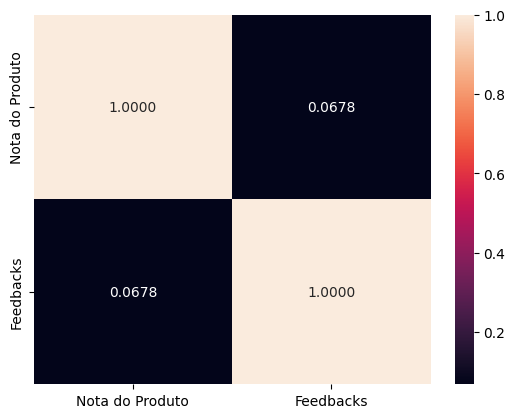

In [89]:
# plot da matriz de correlação
plot = sn.heatmap(corr_cliente, annot = True, fmt=".4f")
plot

### Legenda
- Variáveis que estão dentro da escala de 1 a 0,7 (+ ou -) e na tonalidade laranja no caso das positivas;
- Roxo escuro no caso das negativas, possuem uma forte correlação;
- Variáveis que estão entre 0,7 a 0,5 (+ ou -) e na tonalidade avermelhada no caso das positivas;
- Roxo médio no caso das negativas, possuem correlação moderada; 
- Vvariáveis que possuem escala de 0,5 a 0,25 e (+ ou -) possuem baixa;
- Variáveis com coeficiente próximo a 0 (+ ou -) e com tonalidade vermelha não possuem correlação.

In [90]:
# 22. Relação entre preços e avaliações dos clientes.
df_preco = df_tab1.loc[:,["Preço","Nota do Produto"]]
corr_preco = df_preco.corr()
corr_preco

,Preço,Nota do Produto
Preço,1.000000,0.002083
Nota do Produto,0.002083,1.000000


<Axes: >

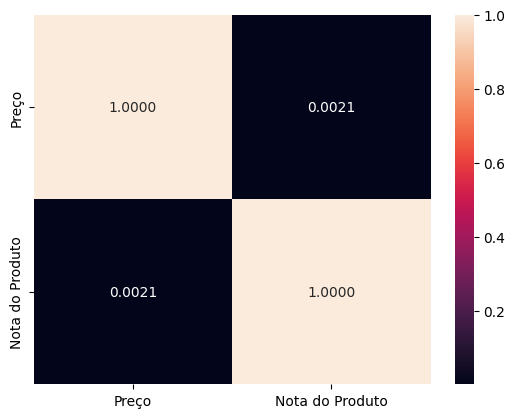

In [91]:
# plot da matriz de correlação
plot = sn.heatmap(corr_preco, annot = True, fmt=".4f")
plot

In [92]:
# 23. Quantos dos produtos comprados no último mês são best-seller?
df_compradosUltimo = df_tab1[df_tab1['Comprados no Último Mês'] != 0]
df_compradosUltimo = df_compradosUltimo[df_compradosUltimo['Best-Seller'] == True]
df = df_compradosUltimo.loc[:,["Comprados no Último Mês"]]
df.count()

Comprados no Último Mês    1128
dtype: int64

## Conclusões


Text(0.5, 1.0, 'Top 5 \n Categorias Mais Vendidas')

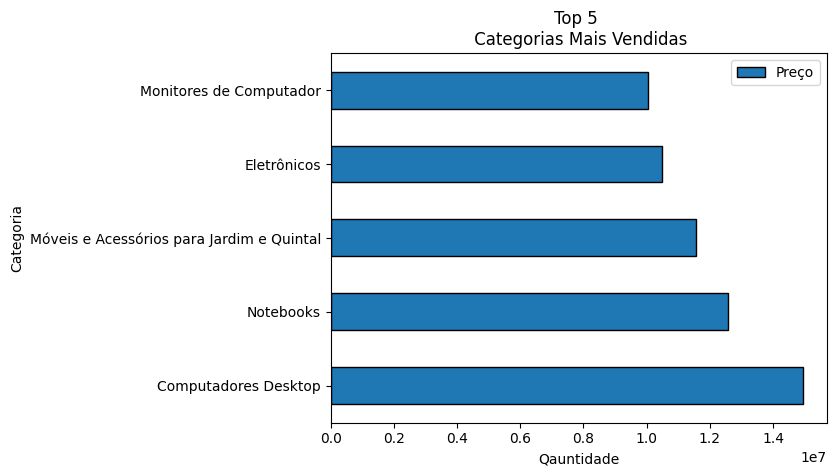

In [93]:
# título, legendas (Y e X)
df_categoriasG = df_precCategS.head(5)
df_categoriasG.plot(kind='barh', edgecolor='black');

plt.xlabel('Qauntidade')
plt.ylabel('Categoria')
plt.title('Top 5 \n Categorias Mais Vendidas')

Text(0.5, 1.0, 'Top 5 \n Média das Categorias Mais Vendidas')

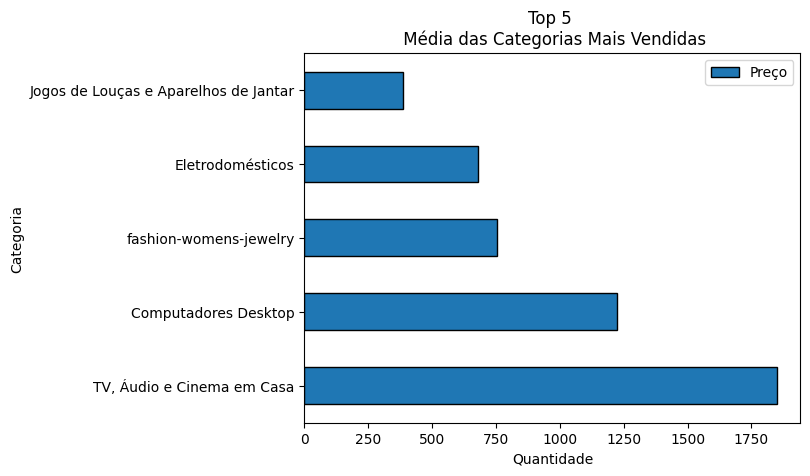

In [94]:
# título, legendas (Y e X)
df_precCategGM = df_precCategM.head(5)
df_precCategGM.plot(kind='barh', edgecolor='black');
plt.xlabel('Quantidade')
plt.ylabel('Categoria')
plt.title('Top 5 \n Média das Categorias Mais Vendidas')

Text(0.5, 1.0, 'Top 5 \n Categorias Mais Vendidas')

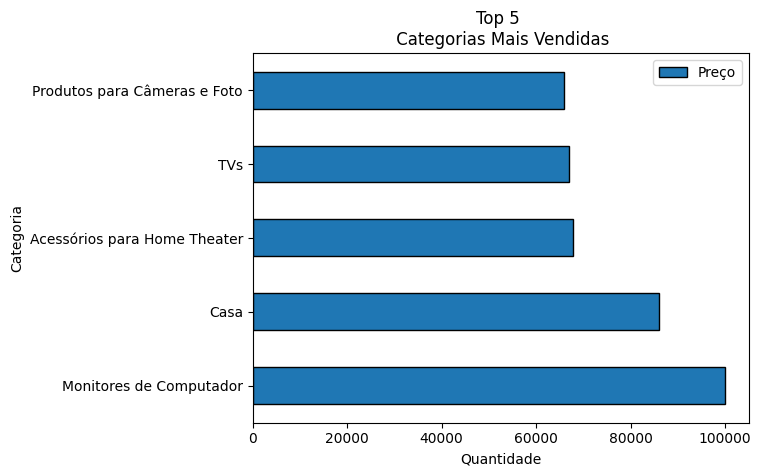

In [95]:
df_precCategG = df_precCategVM.head(5)
df_precCategG.plot(kind='barh', edgecolor='black');
plt.xlabel('Quantidade')
plt.ylabel('Categoria')
plt.title('Top 5 \n Categorias Mais Vendidas')

Por meio da análise dos dados foi possível compreender que os produtos mais caros são:
- Samsung Q90T R$3399
- Samsung Smart TV R$3099
- Samsung TV R$ 2279.05
Nenhum dos três são best-seller.

Os produtos mais baratos são: 
- Elseve, Óleo extraordinário R$36.69
- Neutrogena Sun Fresh R$49.61
- Black Skull R$49.90
Os dois primeiros são best-seller

([<matplotlib.axis.YTick at 0x1b7af454910>,
 [Text(0, 0, 'Samsung Q90T'),
  Text(0, 1, 'Samsung Smart TV'),
  Text(0, 2, 'Samsung TV')])

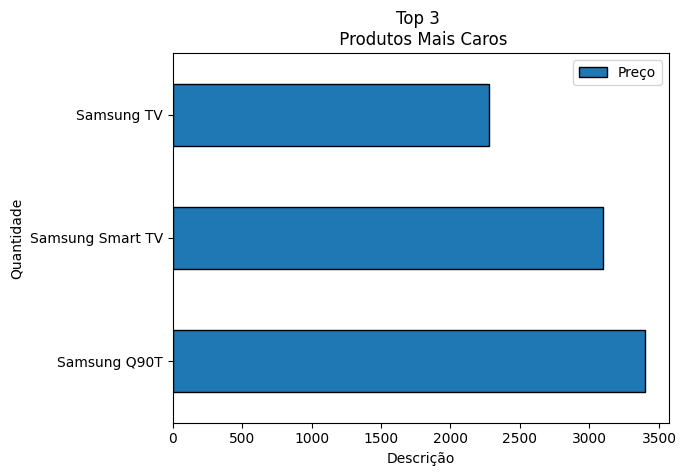

In [113]:
df_produtosMaisL = df_produtosMais.loc[:,["Descrição","Preço"]]

df_produtosMaisG = df_produtosMaisL.head(3)
df_produtosMaisG.plot(kind='barh', edgecolor='black');
plt.xlabel('Quantidade')
plt.ylabel('Descrição')
plt.title('Top 3 \n Produtos Mais Caros')
ticks, label = plt.yticks()
plt.yticks(ticks, labels=['Samsung Q90T', 'Samsung Smart TV', 'Samsung TV'])

([<matplotlib.axis.YTick at 0x1b7af62f940>,
 [Text(0, 0, 'Elseve Óleo extraordinário'),
  Text(0, 1, 'Neutrogena Sun Fresh'),
  Text(0, 2, 'Black Skull')])

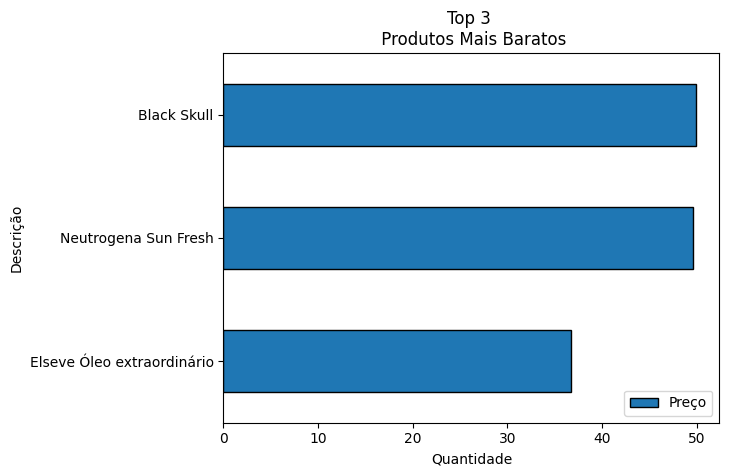

In [116]:
df_produtosMenosL = df_produtosMenos.loc[:,["Descrição","Preço"]]
df_produtosMaisG = df_produtosMenosL.head(3)
df_produtosMaisG.plot(kind='barh', edgecolor='black');
plt.xlabel('Quantidade')
plt.ylabel('Descrição')
plt.title('Top 3 \n Produtos Mais Baratos')
ticks, label = plt.yticks()
plt.yticks(ticks, labels=['Elseve Óleo extraordinário','Neutrogena Sun Fresh','Black Skull'])
